In [31]:
import pandas as pd

results = pd.read_csv(r"C:\Users\hp\Projects\Elections Ad Spending Analysis with Python\results.csv")
advertiser = pd.read_csv(r"C:\Users\hp\Projects\Elections Ad Spending Analysis with Python\advertisers.csv")
locations = pd.read_csv(r"C:\Users\hp\Projects\Elections Ad Spending Analysis with Python\locations.csv")

results.head()





,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


In [87]:
advertiser.head()


,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


In [27]:
locations.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


In [45]:
results['State'] = results['State'].str.strip().str.lower()

locations['Location name'] = locations['Location name'].str.strip().str.lower()

merge_data = results.merge(locations,
                          left_on = 'State',
                          right_on = 'Location name',
                          how = 'left' )


merge_data.head(20)



,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0
5,6,6.0,assam,Kaziranga,2050126,79.33,1626408,1.0,assam,17478091.0
6,7,7.0,assam,Lakhimpur,1577234,76.42,1205331,1.0,assam,17478091.0
7,8,8.0,assam,Sonitpur,1633800,78.46,1281959,1.0,assam,17478091.0
8,9,9.0,bihar,Aurangabad,1871564,50.35,942382,1.0,bihar,53619242.0
9,10,10.0,bihar,Gaya,1816815,52.76,958623,1.0,bihar,53619242.0


In [139]:
state_ad_spend = merge_data.groupby('State')['Amount spent (INR)'].sum().reset_index()

state_ad_spend.head()

,State,Amount spent (INR)
0,andaman & nicobar islands,0.000000e+00
1,andhra pradesh,2.520493e+09
2,arunachal pradesh,2.771308e+06
3,assam,2.446933e+08
4,bihar,2.144770e+09


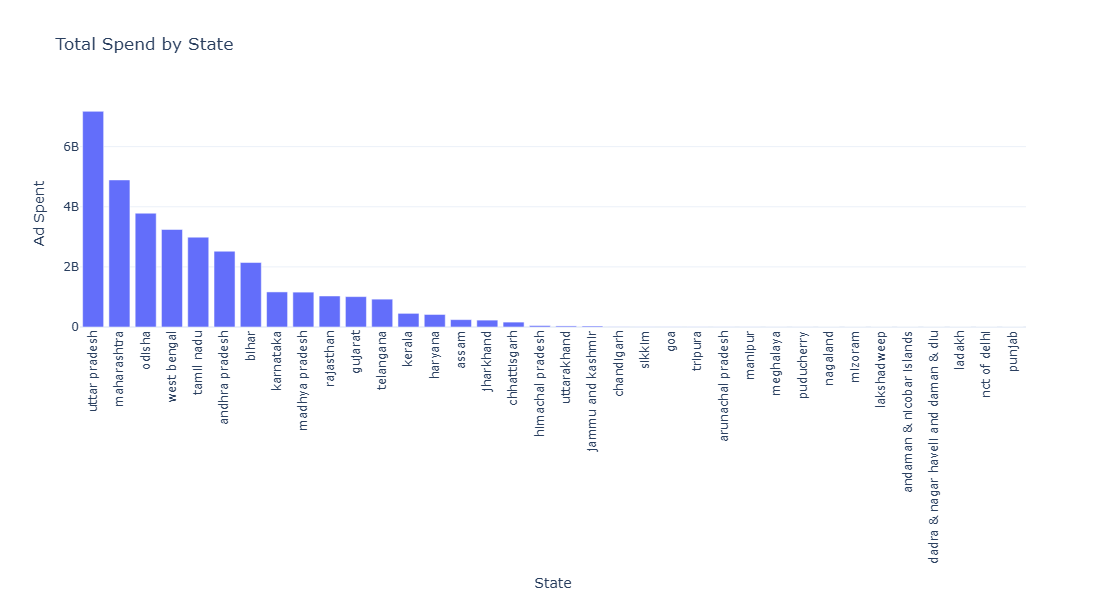

In [89]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = 'plotly_white'

fig = px.bar(state_ad_spend,x='State', y = 'Amount spent (INR)', labels = {'State':'State','Amount spent (INR)':'Ad Spent'}, title='Total Spend by State')
fig.update_layout(xaxis={'categoryorder':'total descending'},
                  
                  height = 600,
                  width = 800,
                  xaxis_tickangle = -90,
                 
                 )
fig.show()

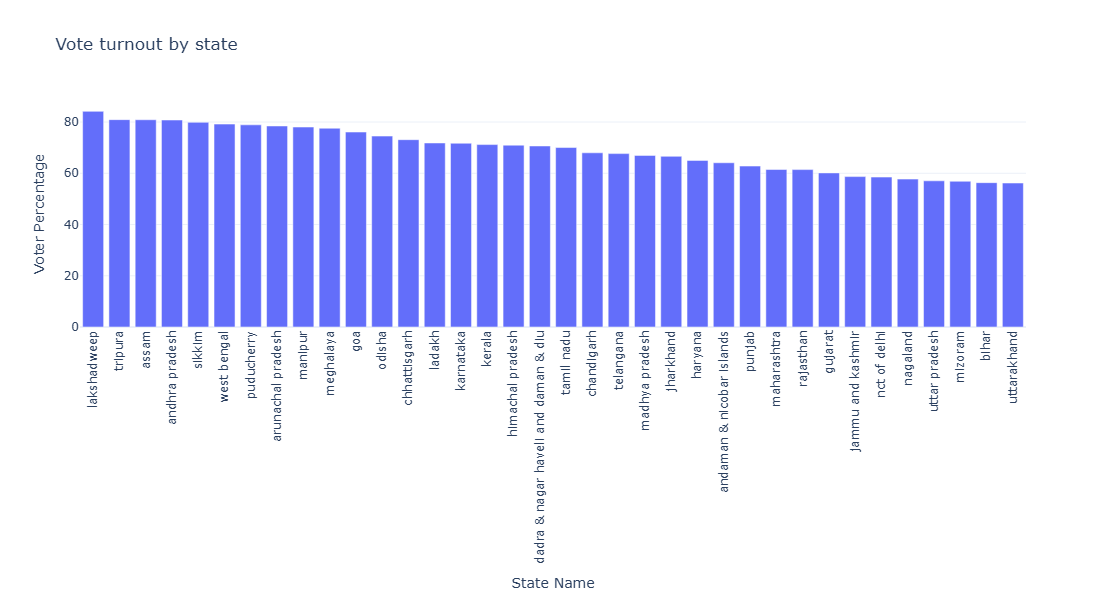

In [115]:

state_voter_turnout = results.groupby('State')['Polled (%)'].mean().reset_index()
#state_voter_turnout.head(100)

fig1 =  px.bar(state_voter_turnout,x = 'State', y = 'Polled (%)',title = 'Vote turnout by state', labels = {'State': 'State Name','Polled (%)':'Voter Percentage'} )
fig1.update_layout(xaxis = {'categoryorder': 'total descending'}, height=600, xaxis_tickangle = -90)
fig1.show()




In [121]:
s = advertiser.dtypes
print(s)

Page ID                      int64
Page name                   object
Disclaimer                  object
Amount spent (INR)          object
Number of ads in Library     int64
dtype: object


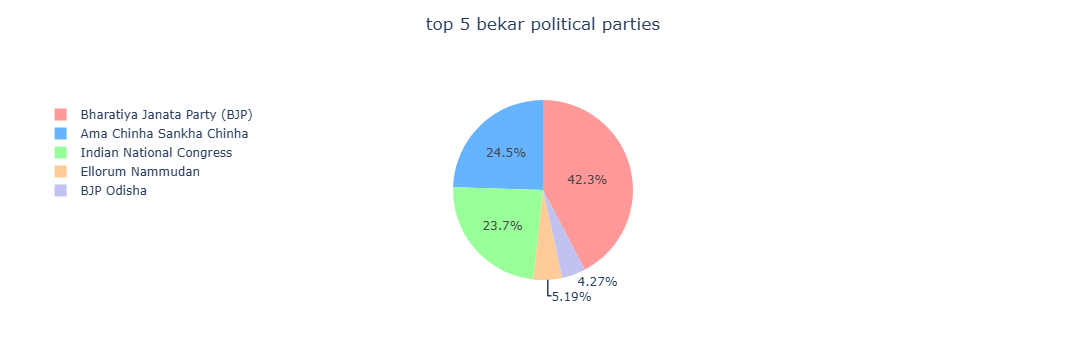

In [214]:
advertiser['Amount spent (INR)'] = pd.to_numeric(advertiser['Amount spent (INR)'], errors = 'coerce')
##s = advertiser.dtypes
#print(s)
#null = advertiser['Amount spent (INR)'].isnull()
#print(null)

advertiser.dropna(subset = ['Amount spent (INR)'], inplace = True)
party_ad_spend = advertiser.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending = False)

top_5_parties = party_ad_spend.head(5).reset_index()
top_5_parties.index +=1

#print(top_5_parties)
#colors = []

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
fig = px.pie(top_5_parties, values = 'Amount spent (INR)',title = 'top 5 bekar political parties',names = 'Page name', color_discrete_sequence = colors)
fig.update_traces(textinfo='percent')

fig.update_layout(
    showlegend = True,
    legend= dict(orientation = "v",
            yanchor = "top",
            y = 1,
            xanchor = "left",
            x=-0.3)
    , title = dict(
        y=0.95,
        x=0.5,
        xanchor = 'center',
        yanchor = 'top')
)

fig.show()



In [220]:
correlation = merge_data[['Amount spent (INR)','Polled (%)']].corr()
print(correlation)

                    Amount spent (INR)  Polled (%)
Amount spent (INR)            1.000000   -0.010688
Polled (%)                   -0.010688    1.000000


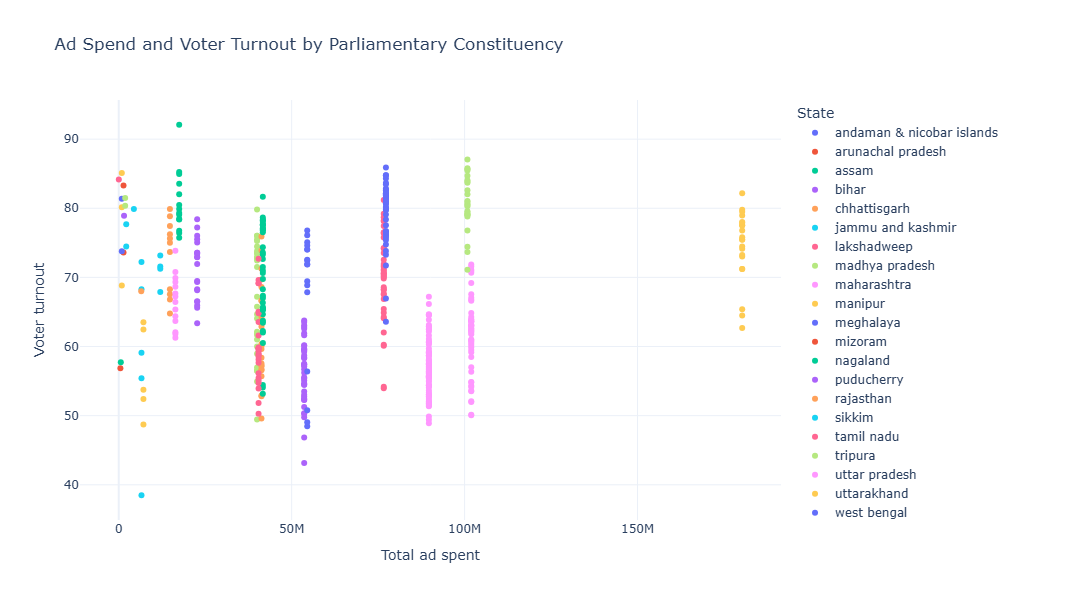

In [236]:
merged_constituency_data = results.merge(locations, left_on = 'State', right_on = 'Location name', how = 'left')
#merged_constituency_data.head()
fig = px.scatter(merged_constituency_data, x = 'Amount spent (INR)', y = 'Polled (%)' , color  = 'State',
                labels= {'Amount spent (INR)': 'Total ad spent','Polled (%)' : 'Voter turnout'},
                title = 'Ad Spend and Voter Turnout by Parliamentary Constituency')
fig.update_layout(height = 600, width = 800)

fig.show()